# N-Gram Language Model

## Part 1: Given a sentence, calculate its probability

### N-gram
P(“its water is so transparent”) =  P(its) × P(water|its) ×  P(is|its water) ×  P(so|its water is) ×  P(transparent|its water is so)
### Bigram
P(“its water is so transparent”) =  P(its) × P(water|its) ×  P(is|water) ×  P(so|is) ×  P(transparent|so)
### Trigram
P(“its water is so transparent”) =  P(its) × P(water|its) ×  P(is|its water) ×  P(so|water is) ×  P(transparent|is so)

- First Make a basic lookup table and n-1 gram count for each word against its context window

In [33]:
# Muhammad Huzaifa
# Roll No: 03-3-1-034-2022

corpus = "<s> Ibrahim I do I like </s> <s> Ibrahim I am </s> <s> I do like Ibrahim I am </s>"

# Set n-gram limit
n = 2 # bigram

In [49]:
training_tokens = corpus.split(" ")
vocablary_count = len(set(training_tokens))

words_lookup = {}
ngram_count = {}
context_window = []

for word in training_tokens:
    context_tuple = tuple(context_window)

    if (context_tuple not in ngram_count):
        ngram_count[context_tuple] = 0
    ngram_count[context_tuple] += 1
    if word not in words_lookup:
        words_lookup[word] = {}
    
    if context_tuple in words_lookup[word]:
        words_lookup[word][context_tuple] += 1
    else:
        words_lookup[word][context_tuple] = 1
    
    if len(context_window) == n - 1:
        context_window.pop(0)
    context_window.append(word)

print(words_lookup)
print(ngram_count)

{'<s>': {(): 1, ('</s>',): 2}, 'Ibrahim': {('<s>',): 2, ('like',): 1}, 'I': {('Ibrahim',): 3, ('do',): 1, ('<s>',): 1}, 'do': {('I',): 2}, 'like': {('I',): 1, ('do',): 1}, '</s>': {('like',): 1, ('am',): 2}, 'am': {('I',): 2}}
{(): 1, ('<s>',): 3, ('Ibrahim',): 3, ('I',): 5, ('do',): 2, ('like',): 2, ('</s>',): 2, ('am',): 2}


- For zero count words add smoothening (for now, we're using add 1 smoothing but Kneser-Ney Smoothing would be better choice if implemented)

In [50]:
smoothened_lookup = words_lookup.copy()

for word in smoothened_lookup:
    for context in ngram_count:
        if context not in smoothened_lookup[word]:
            smoothened_lookup[word][context] = 1
        else:
            smoothened_lookup[word][context] += 1

print(smoothened_lookup)

{'<s>': {(): 2, ('</s>',): 3, ('<s>',): 1, ('Ibrahim',): 1, ('I',): 1, ('do',): 1, ('like',): 1, ('am',): 1}, 'Ibrahim': {('<s>',): 3, ('like',): 2, (): 1, ('Ibrahim',): 1, ('I',): 1, ('do',): 1, ('</s>',): 1, ('am',): 1}, 'I': {('Ibrahim',): 4, ('do',): 2, ('<s>',): 2, (): 1, ('I',): 1, ('like',): 1, ('</s>',): 1, ('am',): 1}, 'do': {('I',): 3, (): 1, ('<s>',): 1, ('Ibrahim',): 1, ('do',): 1, ('like',): 1, ('</s>',): 1, ('am',): 1}, 'like': {('I',): 2, ('do',): 2, (): 1, ('<s>',): 1, ('Ibrahim',): 1, ('like',): 1, ('</s>',): 1, ('am',): 1}, '</s>': {('like',): 2, ('am',): 3, (): 1, ('<s>',): 1, ('Ibrahim',): 1, ('I',): 1, ('do',): 1, ('</s>',): 1}, 'am': {('I',): 3, (): 1, ('<s>',): 1, ('Ibrahim',): 1, ('do',): 1, ('like',): 1, ('</s>',): 1, ('am',): 1}}


- Now Normalize the counts with n-1 gram counts!

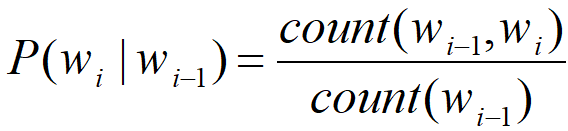

In [51]:
normalize_lookup = smoothened_lookup.copy()

for word in normalize_lookup:
    for context in normalize_lookup[word]:
        normalize_lookup[word][context] /= ngram_count[context] + vocablary_count

print (normalize_lookup)
        

{'<s>': {(): 0.25, ('</s>',): 0.3333333333333333, ('<s>',): 0.1, ('Ibrahim',): 0.1, ('I',): 0.08333333333333333, ('do',): 0.1111111111111111, ('like',): 0.1111111111111111, ('am',): 0.1111111111111111}, 'Ibrahim': {('<s>',): 0.3, ('like',): 0.2222222222222222, (): 0.125, ('Ibrahim',): 0.1, ('I',): 0.08333333333333333, ('do',): 0.1111111111111111, ('</s>',): 0.1111111111111111, ('am',): 0.1111111111111111}, 'I': {('Ibrahim',): 0.4, ('do',): 0.2222222222222222, ('<s>',): 0.2, (): 0.125, ('I',): 0.08333333333333333, ('like',): 0.1111111111111111, ('</s>',): 0.1111111111111111, ('am',): 0.1111111111111111}, 'do': {('I',): 0.25, (): 0.125, ('<s>',): 0.1, ('Ibrahim',): 0.1, ('do',): 0.1111111111111111, ('like',): 0.1111111111111111, ('</s>',): 0.1111111111111111, ('am',): 0.1111111111111111}, 'like': {('I',): 0.16666666666666666, ('do',): 0.2222222222222222, (): 0.125, ('<s>',): 0.1, ('Ibrahim',): 0.1, ('like',): 0.1111111111111111, ('</s>',): 0.1111111111111111, ('am',): 0.1111111111111111}

- Now that we have our probability tables, we can now predict the probability of a given sentence

In [52]:
sentence = "<s> Ibrahim I am"

tokens = [token for token in sentence.split(' ') if token]

probability = 1.0
context_window = []

for word in tokens:
    context_tuple = tuple(context_window)
    
    probability *= normalize_lookup[word].get(context_tuple, 0)

    # slide context_window
    if len(context_window) == n - 1:
        context_window.pop(0)
    context_window.append(word)

print("The probability of given sentence is: " + str(probability))

The probability of given sentence is: 0.0075
